Assignment 5: Risk
Author: Marcella Morgan

This was really hard Andrew! I could not understand why the order of the elements in each row of the arrays were not being sorted in decending order. It was because I was just using [::-1] and so it was reversing the rows. Becasue I had no idea what order the rows had been generated in I had no idea they were being reversed. After hours of hair pulling I resorted to using Chatgpt. It explained what the issue was and gave me this bit of code [...] so that it would sort the elements in the rows and not the rows. I still don't understand how this works exaclty but anyway it seems to be working.


In [73]:
# (1)&(2) generating and sorting the dice throws

import numpy as np
import matplotlib.pyplot as plt

# Risk function:

def skirmish(rounds):
    
    # creating attacker's 2D array and sorting each row in descending order
    attacker_rolls = np.sort(np.random.randint(1, 7, (rounds, 3)))[...,::-1]
    
    # creating defender's 2D array and sorting each row in descending order
    defender_rolls = np.sort(np.random.randint(1, 7, (rounds, 2)))[...,::-1]
    
    # making empty lists to fill
    attacker_loses = []
    defender_loses = []
    
    for x in range(rounds):

       

        # Initialize losses for this round
            round_attacker_loss = 0
            round_defender_loss = 0

        # Comparing the first dice roll
            if attacker_rolls[x, 0] > defender_rolls[x, 0]:
                round_defender_loss += 1
            
            else:
                round_attacker_loss += 1

        # Comparing the second dice roll
            if attacker_rolls[x, 1] > defender_rolls[x, 1]:
                round_defender_loss += 1
            
            else:
                round_attacker_loss += 1

        # Add losses for this round to list
            attacker_loses.append(round_attacker_loss)
            defender_loses.append(round_defender_loss)
            
            total_attacker_losses = sum(attacker_loses)
            total_defender_losses = sum(defender_loses)
    
    return total_attacker_losses, total_defender_losses





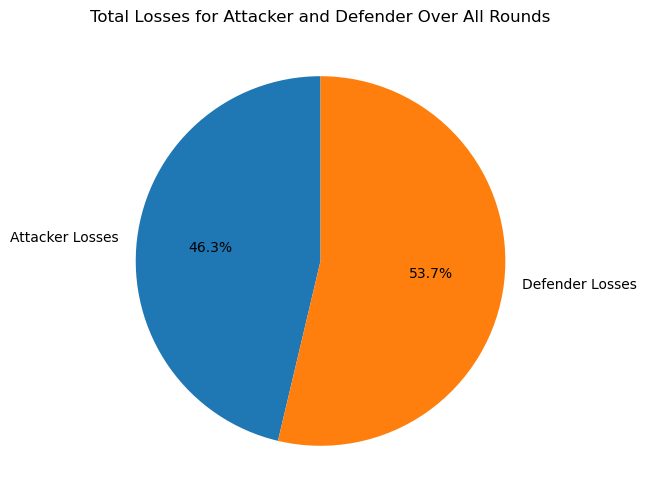

In [156]:

attacker, defender = skirmish(1000)

# Data for the pie chart
labels = ['Attacker Losses', 'Defender Losses']
sizes = [attacker, defender]

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Total Losses for Attacker and Defender Over All Rounds")
plt.show()

    